In [1]:
import os

path = os.listdir('brain_tumor/Training/')
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'brain_tumor/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 1)
        img = cv2.resize(img, (256,256))
        X.append(img)
        Y.append(classes[cls])

In [4]:
X = np.array(X)
Y = np.array(Y)

In [5]:
Y

array([0, 0, 0, ..., 1, 1, 1])

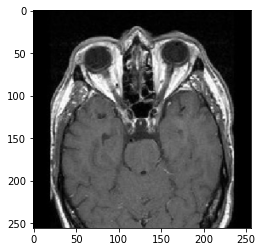

In [6]:
plt.imshow(X[0], cmap='gray')

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, random_state=10,
                                               test_size=.20)

In [8]:
xtrain.shape, xtest.shape

((977, 256, 256, 3), (245, 256, 256, 3))

In [9]:
#Model building starts
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D,BatchNormalization,MaxPool2D
import numpy as np
tf.keras.backend.clear_session()

In [10]:
CNN = Sequential()
#
CNN.add(Conv2D(filters = 64, kernel_size = (3,3), 
                 activation ='relu', input_shape = (256,256,3)))
CNN.add(MaxPool2D(pool_size=(2,2)))
CNN.add(Dropout(0.2))

#
CNN.add(Conv2D(filters = 128, kernel_size = (3,3), 
                 activation ='relu'))
CNN.add(MaxPool2D(pool_size=(2,2)))
CNN.add(Dropout(0.2))

#
CNN.add(Conv2D(filters = 128, kernel_size = (3,3), 
                 activation ='relu'))
CNN.add(MaxPool2D(pool_size=(2,2)))
CNN.add(Dropout(0.2))

#
CNN.add(Conv2D(filters = 128, kernel_size = (3,3), 
                 activation ='relu'))
CNN.add(MaxPool2D(pool_size=(2,2)))
CNN.add(Dropout(0.2))

# 
CNN.add(Flatten())
CNN.add(Dense(256, activation = "relu"))
CNN.add(Dropout(0.25))
CNN.add(Dense(2, activation = "softmax"))

In [11]:
CNN.compile(optimizer='Adam',
            loss='sparse_categorical_crossentropy',
             metrics=["accuracy"])

In [12]:
xx=xtrain
yy=ytrain
# xtrain = tf.reshape(xtrain, shape=[-1, 1])

# ytrain = tf.reshape(ytrain, shape=[-1, 1])
xtrain

array([[[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [2, 2, 2],
         [1, 1, 1],
         [1, 1, 1]],

        [[2, 2, 2],
         [2, 2, 2],
         [2, 2, 2],
         ...,
         [3, 3, 3],
         [2, 2, 2],
         [2, 2, 2]],

        ...,

        [[2, 2, 2],
         [2, 2, 2],
         [2, 2, 2],
         ...,
         [3, 3, 3],
         [3, 3, 3],
         [3, 3, 3]],

        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [2, 2, 2],
         [2, 2, 2],
         [2, 2, 2]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]],


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [2, 2, 2],
         [2, 2, 2],
         [3, 3, 3]],

        [[0, 0, 0],
         [0,

In [13]:
CNN.fit(xtrain, ytrain, epochs=20, batch_size=20)

Epoch 1/20
49/49 [==============================] - 127s 3s/step - loss: 27.5902 - accuracy: 0.6991
Epoch 2/20
49/49 [==============================] - 137s 3s/step - loss: 0.3669 - accuracy: 0.8516
Epoch 3/20
49/49 [==============================] - 136s 3s/step - loss: 0.3107 - accuracy: 0.8772
Epoch 4/20
49/49 [==============================] - 131s 3s/step - loss: 0.2732 - accuracy: 0.8966
Epoch 5/20
49/49 [==============================] - 129s 3s/step - loss: 0.2048 - accuracy: 0.9202
Epoch 6/20
49/49 [==============================] - 129s 3s/step - loss: 0.2068 - accuracy: 0.9284
Epoch 7/20
49/49 [==============================] - 134s 3s/step - loss: 0.1489 - accuracy: 0.9509
Epoch 8/20
49/49 [==============================] - 131s 3s/step - loss: 0.1338 - accuracy: 0.9560
Epoch 9/20
49/49 [==============================] - 137s 3s/step - loss: 0.1133 - accuracy: 0.9632
Epoch 10/20
49/49 [==============================] - 137s 3s/step - loss: 0.0913 - accuracy: 0.9652
Epoch 11

In [14]:
pred = CNN.predict(xtest)

8/8 [==============================] - 10s 1s/step


In [15]:
misclassified=np.where(ytest!=pred)
misclassified

C:\Users\hp\AppData\Local\Temp\ipykernel_15748\2734279285.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  misclassified=np.where(ytest!=pred)


(array([0], dtype=int64),)

In [16]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  1
[4.9869673e-09 1.0000000e+00] 1


In [17]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

1/1 [==============================] - 0s 69ms/step
[[1.0000000e+00 3.2564168e-12]]
1/1 [==============================] - 0s 60ms/step
[[9.9999213e-01 7.8698231e-06]]
1/1 [==============================] - 0s 60ms/step
[[1.000000e+00 6.064298e-13]]
1/1 [==============================] - 0s 61ms/step
[[1.0000000e+00 1.5881623e-08]]
1/1 [==============================] - 0s 56ms/step
[[1.0000000e+00 1.0036949e-09]]
1/1 [==============================] - 0s 62ms/step
[[9.9996579e-01 3.4259767e-05]]
1/1 [==============================] - 0s 55ms/step
[[9.9996030e-01 3.9725364e-05]]
1/1 [==============================] - 0s 55ms/step
[[9.999931e-01 6.868923e-06]]
1/1 [==============================] - 0s 57ms/step
[[9.999999e-01 7.886006e-08]]


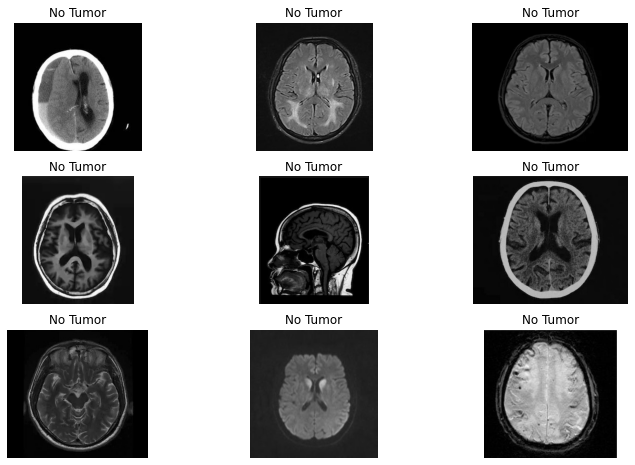

In [18]:
plt.figure(figsize=(12,8))
p = os.listdir('brain_tumor/Testing/')
c=1
for i in os.listdir('brain_tumor/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('brain_tumor/Testing/no_tumor/'+i,1)
    img1 = cv2.resize(img, (256,256))
    img1 = img1.reshape(1, 256, 256, 3)
    p = CNN.predict(img1)
    print(p)
    if p[0][0]>=.5:
        plt.title(dec[0])
    else:
        plt.title(dec[1])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

1/1 [==============================] - 0s 51ms/step
[[0.29765368 0.7023463 ]]
0.29765368
1/1 [==============================] - 0s 60ms/step
[[0.00114048 0.9988595 ]]
0.0011404782
1/1 [==============================] - 0s 61ms/step
[[4.9869575e-09 1.0000000e+00]]
4.9869575e-09
1/1 [==============================] - 0s 55ms/step
[[0.00582666 0.99417335]]
0.0058266623
1/1 [==============================] - 0s 64ms/step
[[1.5498843e-04 9.9984503e-01]]
0.00015498843
1/1 [==============================] - 0s 64ms/step
[[0.07282612 0.9271739 ]]
0.072826125
1/1 [==============================] - 0s 53ms/step
[[0.98766553 0.0123345 ]]
0.98766553
1/1 [==============================] - 0s 56ms/step
[[0.29765368 0.7023463 ]]
0.29765368
1/1 [==============================] - 0s 53ms/step
[[0.98766553 0.0123345 ]]
0.98766553
1/1 [==============================] - 0s 55ms/step
[[0.98766553 0.0123345 ]]
0.98766553
1/1 [==============================] - 0s 51ms/step
[[3.6560776e-04 9.9963439e-01]]
0.0

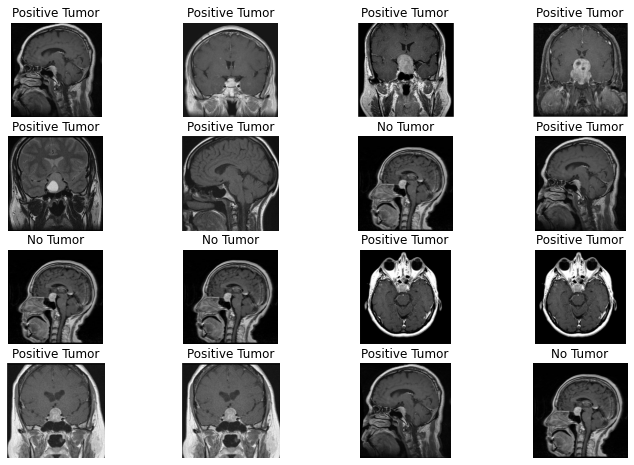

In [19]:
plt.figure(figsize=(12,8))
p = os.listdir('brain_tumor/Testing/')
c=1
for i in os.listdir('brain_tumor/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('brain_tumor/Testing/pituitary_tumor/'+i,1)
    img1 = cv2.resize(img, (256,256))
    img1 = img1.reshape(1, 256, 256, 3)
    p = CNN.predict(img1)
    print(p)
    print(p[0][0])
    if p[0][0]>=.5:
        plt.title(dec[0])
    else:
        plt.title(dec[1])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

In [20]:
print(ytest)

[1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1
 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0
 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1
 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1]


In [21]:
pred_y = np.argmax(pred, axis=1)
print(pred_y)

[1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1
 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0
 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0
 1 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1]


In [22]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,precision_score, f1_score, recall_score,accuracy_score
print("CNN Model Metrics")
print('Accuracy: ', accuracy_score(ytest, pred_y))
print('Precision: ', precision_score(ytest, pred_y))
print('F1 Score: ', f1_score(ytest, pred_y))
print('Recall Score: ', recall_score(ytest, pred_y))
print('Roc Auc Score: ', roc_auc_score(ytest, pred_y))

CNN Model Metrics
Accuracy:  0.9755102040816327
Precision:  0.9759036144578314
F1 Score:  0.9818181818181818
Recall Score:  0.9878048780487805
Roc Auc Score:  0.9692110809996989
